# Dimensionality Reduction

- **Curse of Dimensionality**:
  - High-dimensional datasets (with thousands or millions of features) make training slow and often lead to overfitting, as the data becomes sparse and hard to model. This phenomenon is known as the curse of dimensionality.
  
- **Why Reduce Dimensions?**:
  - **Practical Reduction**: In real-world problems, the number of features can often be reduced without losing much information, such as removing irrelevant or redundant features.
  - **Example**: In the MNIST dataset, border pixels (usually white) and neighboring highly correlated pixels can be removed or merged, simplifying the problem.
  
- **Warning**:
  - **Information Loss**: Reducing dimensionality can cause information loss, potentially reducing model performance, though it may also filter out noise.
  - **Complex Pipelines**: It adds complexity to the pipeline, so it's recommended to try the original data first.

- **Advantages**:
  - **Faster Training**: Reducing dimensions makes training faster.
  - **Data Visualization**: Lowering dimensions to 2D or 3D makes it easier to visualize the data and identify patterns, clusters, or relationships. Visualization is also useful for communicating results to non-data scientists.

- **Main Approaches**:
  - **Projection**: Reducing dimensions by projecting data onto a lower-dimensional subspace.
  - **Manifold Learning**: Assumes that the data lies on a lower-dimensional manifold within the high-dimensional space.

- **Techniques**:
  - **Principal Component Analysis (PCA)**: Projects data onto the directions of maximum variance.
  - **Random Projection**: Projects data onto a lower-dimensional space using random projections.
  - **Locally Linear Embedding (LLE)**: A nonlinear technique that preserves local relationships between data points.

- **Curse of Dimensionality in High-Dimensional Space**:
  - **Space Behavior**: Points in high dimensions behave counterintuitively, such as being far apart in a high-dimensional unit hypercube despite lying within the same space.
  - **Sparse Datasets**: High-dimensional datasets tend to be sparse, making predictions less reliable and increasing the risk of overfitting.
  - **Exponential Growth of Training Set**: The number of training instances needed to cover the space increases exponentially with the number of dimensions, making it impractical to achieve a dense enough dataset.

- **Key Insight**: Reducing dimensionality is essential not only for computational efficiency but also for overcoming the challenges of working in high-dimensional spaces.


**Remark:** Can be start from the section PCA for fast learning.

In [48]:
# import basic modules
import sklearn
import numpy as np
import matplotlib.pyplot as plt

### Projection

- **Real-World High-Dimensional Data**:
  - In many cases, training instances are not uniformly distributed across all dimensions. Some features may be constant or highly correlated, causing the data to lie within a lower-dimensional subspace.
  
- **Lower-Dimensional Subspaces**:
  - Often, high-dimensional data exists in or near a much lower-dimensional subspace of the original space.
  - Example: A 3D dataset may mostly lie on a 2D plane.

- **Dimensionality Reduction via Projection**:
  - By projecting data points onto a lower-dimensional subspace, we reduce the dimensionality.
  - **Projection Example**: A 3D dataset can be projected onto a 2D plane, transforming the dataset into a 2D form.

- **New Features**:
  - After projection, the data is represented by new features (e.g., \( z_1 \) and \( z_2 \)), which correspond to the coordinates of the projected points in the lower-dimensional space.


**Task:** generating a small 3D dataset. It's an oval shape, rotated in 3D space, with points distributed unevenly, and with quite a lot of noise.

In [49]:
# importing modules, generating data  to demonstate the concept

from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # generating a matrix, 3 dimensional data
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # making distribution uneven
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # setting the oval
X += 0.28 * np.random.randn(m, 3)  # adding random noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]  # shift a bit

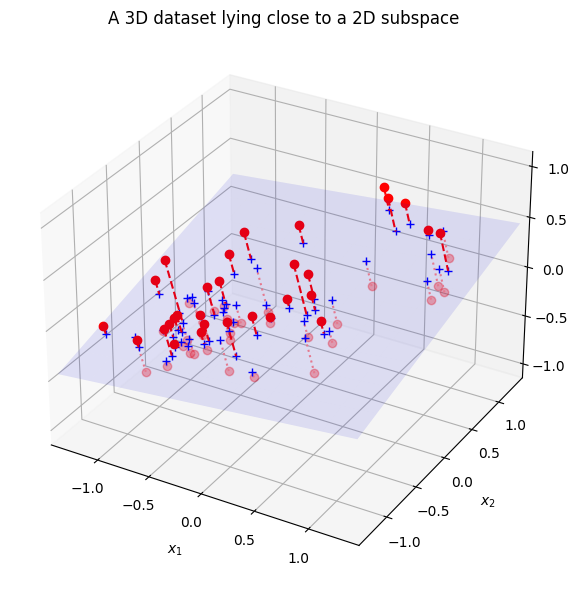

In [50]:
# Importing necessary libraries
from sklearn.decomposition import PCA

# Assuming X is the dataset and m is the number of samples
# PCA transformation from 3D to 2D
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)  # Convert 3D data to 2D
X3D_inv = pca.inverse_transform(X2D)  # Inverse transform to get 3D projected points

# Center the dataset
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

# Define axes limits for the plot
axes = [-1.4, 1.4, -1.4, 1.4, -1.1, 1.1]
x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 10),
                     np.linspace(axes[2], axes[3], 10))

# Solve for the projection plane coefficients
w1, w2 = np.linalg.solve(Vt[:2, :2], Vt[:2, 2])
z = w1 * (x1 - pca.mean_[0]) + w2 * (x2 - pca.mean_[1]) - pca.mean_[2]  # Plane equation

# Separate samples above and below the plane
X3D_above = X[X[:, 2] >= X3D_inv[:, 2]]  # Samples above plane
X3D_below = X[X[:, 2] < X3D_inv[:, 2]]  # Samples below plane

# Plotting the 3D dataset with the projection plane
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")

# Plot samples below the plane and projection lines
ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "ro", alpha=0.3)
for i in range(m):
    if X[i, 2] < X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], ":", color="#F88")

# Plot the projection plane
ax.plot_surface(x1, x2, z, alpha=0.1, color="b")  # Projection plane

# Plot projected points
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b+")

# Plot samples and projection lines above the plane
for i in range(m):
    if X[i, 2] >= X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], "r--")

# Plot the samples above the plane
ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "ro")

# Set labels and axis limits
def set_xyz_axes(ax, axes):
    ax.xaxis.set_rotate_label(False)
    ax.yaxis.set_rotate_label(False)
    ax.zaxis.set_rotate_label(False)
    ax.set_xlabel("$x_1$", labelpad=8, rotation=0)
    ax.set_ylabel("$x_2$", labelpad=8, rotation=0)
    ax.set_zlabel("$x_3$", labelpad=8, rotation=0)
    ax.set_xlim(axes[0:2])
    ax.set_ylim(axes[2:4])
    ax.set_zlim(axes[4:6])

# Apply axis settings
set_xyz_axes(ax, axes)
ax.set_zticks([-1, -0.5, 0, 0.5, 1])
plt.title("A 3D dataset lying close to a 2D subspace", fontsize=12)
plt.tight_layout()
plt.show()


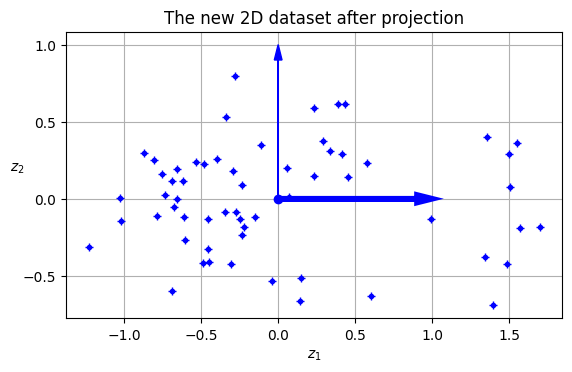

In [51]:
# The new 2D dataset after projection
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect='equal')
ax.plot(X2D[:, 0], X2D[:, 1], "b+")
ax.plot(X2D[:, 0], X2D[:, 1], "b.")
ax.plot([0], [0], "bo")
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='b', ec='b', linewidth=4)
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='b', ec='b', linewidth=1)
ax.set_xlabel("$z_1$")
ax.set_yticks([-0.5, 0, 0.5, 1])
ax.set_ylabel("$z_2$", rotation=0)
ax.set_axisbelow(True)
ax.grid(True)
plt.title("The new 2D dataset after projection")
plt.show()

### Manifold Learning
#### Main Points:

- **Limitations of Projection**:
  - Projection isn’t always ideal for dimensionality reduction, especially in cases where the data lies on a complex structure, such as a **Swiss roll**. Simple projection (e.g., dropping one dimension) could distort the data by squashing layers together.

- **Manifolds**:
  - A **manifold** is a lower-dimensional shape (e.g., 2D) that can twist and bend in a higher-dimensional space (e.g., 3D).
  - The **Swiss roll** is an example of a 2D manifold within 3D space. Unrolling it would preserve its structure better than projection.

- **Manifold Learning**:
  - This refers to dimensionality reduction techniques that aim to model the underlying manifold in the data, based on the **manifold assumption** (or hypothesis).
  - The assumption is that real-world high-dimensional data often lies close to a lower-dimensional manifold. For instance, handwritten digits like in the MNIST dataset share similarities that reduce the effective dimensionality.

- **Simplification of the Task**:
  - The task (e.g., classification) is assumed to be simpler when expressed in the manifold's lower-dimensional space.
  - For example, in a 2D unrolled Swiss roll, a decision boundary may become simpler than in the original 3D space.

- **Exceptions**:
  - The implicit assumption that a task becomes simpler in lower-dimensional space doesn't always hold.
  - Sometimes the decision boundary may be simpler in the higher-dimensional space, as seen in some Swiss roll examples.

- **Dimensionality Reduction Trade-Off**:
  - While dimensionality reduction often speeds up model training, it doesn't always lead to better or simpler solutions. The outcome depends on the dataset and the manifold's structure.

- **Key Takeaway**:
  - Manifold learning can effectively combat the **curse of dimensionality**, especially when the manifold assumption holds, by reducing the number of features while maintaining the structure of the data.


In [52]:
# import module and preparing the data
from sklearn.datasets import make_swiss_roll

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

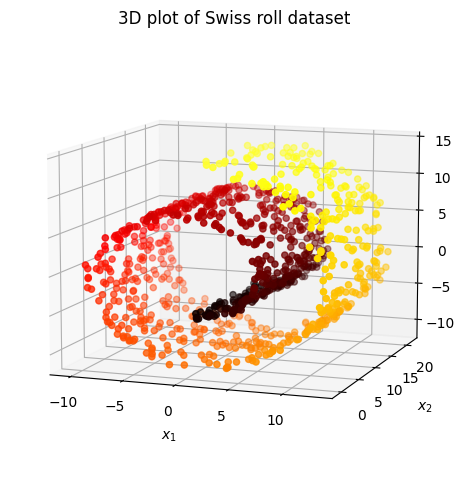

In [53]:
# importing module for colormap, and ploting the swiss roll data
from matplotlib.colors import ListedColormap

darker_hot = ListedColormap(plt.cm.hot(np.linspace(0, 0.8, 256)))

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=t, cmap=darker_hot)
ax.view_init(10, -70)
set_xyz_axes(ax, axes)
plt.title("3D plot of Swiss roll dataset")
plt.tight_layout()
plt.show()

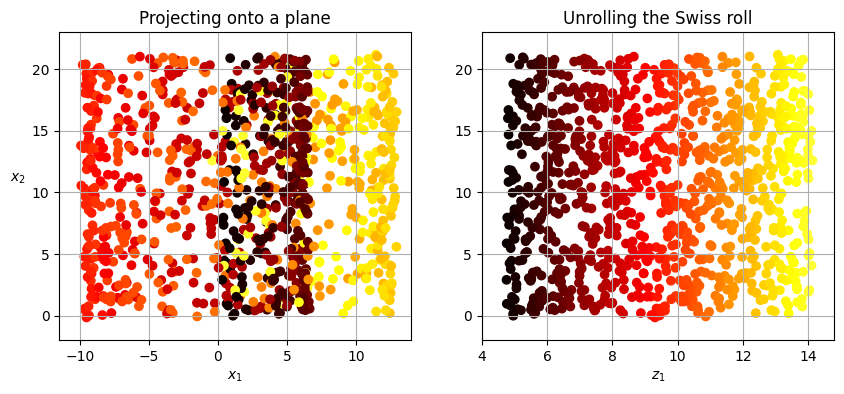

In [54]:
# Squashing by projecting onto a plane versus unrolling the Swiss roll

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.scatter(X_swiss[:, 0], X_swiss[:, 1], c=t, cmap=darker_hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", labelpad=10, rotation=0)
plt.grid(True)
plt.title("Projecting onto a plane")

plt.subplot(122)
plt.scatter(t, X_swiss[:, 1], c=t, cmap=darker_hot)
plt.axis([4, 14.8, axes[2], axes[3]])
plt.xlabel("$z_1$")
plt.grid(True)
plt.title("Unrolling the Swiss roll")

plt.show()

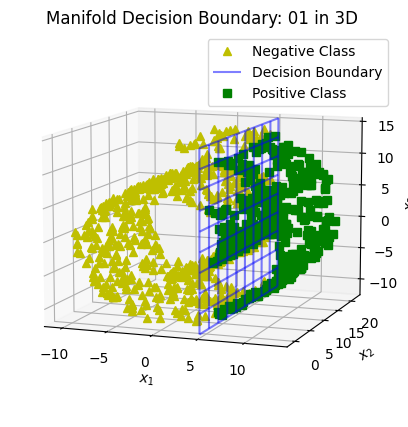

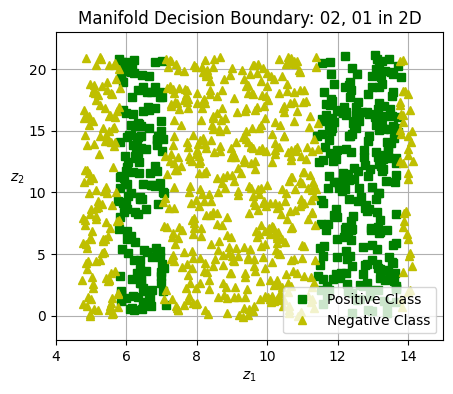

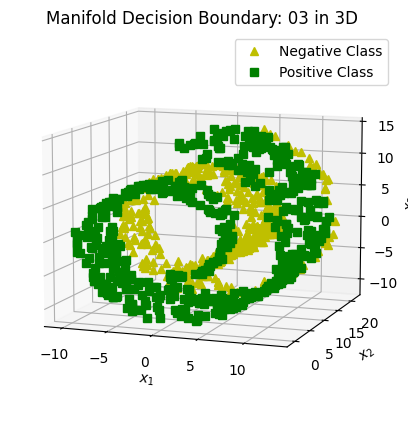

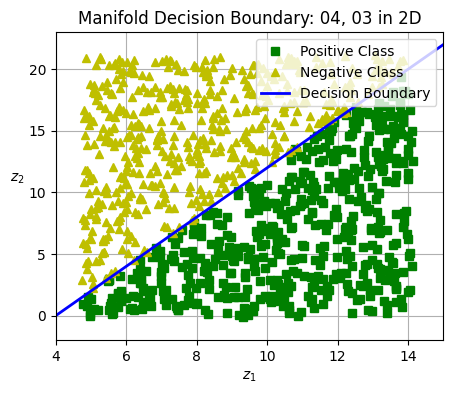

In [55]:
# Assuming the necessary imports are done, and variables X_swiss, t, etc., are already defined.

# Set up the axis limits
axes = [-11.5, 14, -2, 23, -12, 15]
x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

# Separate the dataset into positive and negative classes based on the condition
positive_class = X_swiss[:, 0] > 5
X_pos = X_swiss[positive_class]
X_neg = X_swiss[~positive_class]

# Plot the 3D decision boundary (Mainfold Decision Boundary: 01)
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.view_init(10, -70)

# Plot the negative and positive classes
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^", label="Negative Class")
ax.plot_wireframe(np.full(x2.shape, 5), x2, x3, alpha=0.5, color='blue', label="Decision Boundary")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs", label="Positive Class")

# Set axes labels
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

# Set title and show the plot
ax.set_title("Manifold Decision Boundary: 01 in 3D")
plt.legend()
plt.show()

# Plot the decision boundary in 2D (Manifold Decision Boundary: 02)
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)

# Plot positive and negative classes
ax.plot(t[positive_class], X_swiss[positive_class, 1], "gs", label="Positive Class")
ax.plot(t[~positive_class], X_swiss[~positive_class, 1], "y^", label="Negative Class")

# Set axis limits and labels
ax.axis([4, 15, axes[2], axes[3]])
ax.set_xlabel("$z_1$")
ax.set_ylabel("$z_2$", rotation=0, labelpad=8)
ax.grid(True)

# Set title and show the plot
ax.set_title("Manifold Decision Boundary: 02, 01 in 2D")
plt.legend()
plt.show()

# Define new positive class based on a different condition
positive_class = 2 * (t[:] - 4) > X_swiss[:, 1]
X_pos = X_swiss[positive_class]
X_neg = X_swiss[~positive_class]

# Plot the new 3D decision boundary (Manifold Decision Boundary: 03)
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.view_init(10, -70)

# Plot negative and positive classes
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^", label="Negative Class")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs", label="Positive Class")

# Set axis labels and limits
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

# Set title and show the plot
ax.set_title("Manifold Decision Boundary: 03 in 3D")
plt.legend()
plt.show()

# Plot the decision boundary in 2D with the new condition (Manifold Decision Boundary: 04)
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)

# Plot positive and negative classes
ax.plot(t[positive_class], X_swiss[positive_class, 1], "gs", label="Positive Class")
ax.plot(t[~positive_class], X_swiss[~positive_class, 1], "y^", label="Negative Class")

# Plot the decision boundary line
ax.plot([4, 15], [0, 22], "b-", linewidth=2, label="Decision Boundary")

# Set axis limits, labels, and grid
ax.axis([4, 15, axes[2], axes[3]])
ax.set_xlabel("$z_1$")
ax.set_ylabel("$z_2$", rotation=0, labelpad=8)
ax.grid(True)

# Set title and show the plot
ax.set_title("Manifold Decision Boundary: 04, 03 in 2D")
plt.legend()
plt.show()


## Principal Component Analysis (PCA)

**PCA** is the most widely used dimensionality reduction algorithm. It works by identifying the hyperplane that is closest to the data and then projecting the data onto this hyperplane.

### Preserving the Variance

To reduce the dimensionality of a dataset, PCA selects the right hyperplane by preserving as much of the variance as possible.

- Consider a simple 2D dataset, where three different axes (1D hyperplanes) are shown.
- Projecting the data onto the solid line preserves the **maximum variance**.
- The projection onto the dashed line preserves an **intermediate variance**, and the projection onto the dotted line preserves the **least variance**.

PCA chooses the axis that **preserves the maximum variance**, as it retains more information from the original dataset. This choice also minimizes the **mean squared distance** between the original data and its projection onto the selected axis.

This simple idea forms the foundation of PCA.

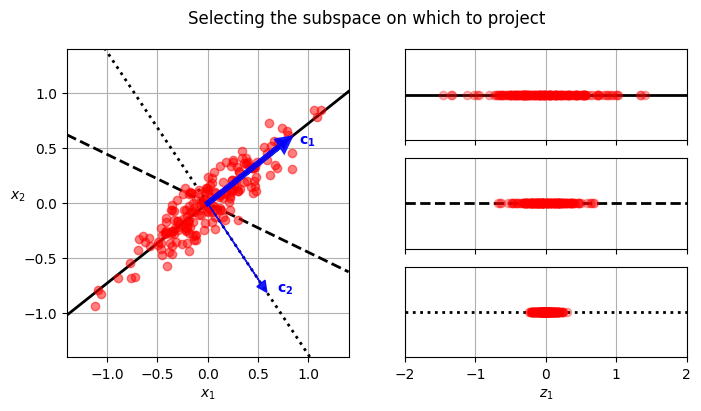

In [56]:
# Selecting the subspace on which to project

# Generate the data and select the subspace on which to project
angle = np.pi / 5
stretch = 5
m = 200

# Set random seed for reproducibility
np.random.seed(3)

# Generate random 2D data
X_line = np.random.randn(m, 2) / 10
X_line = X_line @ np.array([[stretch, 0], [0, 1]])  # Stretch the data
X_line = X_line @ np.array([[np.cos(angle), np.sin(angle)],  # Rotate the data
                            [-np.sin(angle), np.cos(angle)]])

# Define projection vectors
u1 = np.array([np.cos(angle), np.sin(angle)])  # Main axis for projection
u2 = np.array([np.cos(angle - 2 * np.pi / 6), np.sin(angle - 2 * np.pi / 6)])  # Another axis
u3 = np.array([np.cos(angle - np.pi / 2), np.sin(angle - np.pi / 2)])  # Orthogonal axis

# Project data onto these vectors
X_proj1 = X_line @ u1.reshape(-1, 1)
X_proj2 = X_line @ u2.reshape(-1, 1)
X_proj3 = X_line @ u3.reshape(-1, 1)

# Plot the data and projections
plt.figure(figsize=(8, 4))

# Original 2D data and projection axes
plt.subplot2grid((3, 2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4 * u1[1] / u1[0], 1.4 * u1[1] / u1[0]], "k-", linewidth=2)
plt.plot([-1.4, 1.4], [-1.4 * u2[1] / u2[0], 1.4 * u2[1] / u2[0]], "k--", linewidth=2)
plt.plot([-1.4, 1.4], [-1.4 * u3[1] / u3[0], 1.4 * u3[1] / u3[0]], "k:", linewidth=2)
plt.plot(X_line[:, 0], X_line[:, 1], "ro", alpha=0.5)
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=4, alpha=0.9,
          length_includes_head=True, head_length=0.1, fc="b", ec="b", zorder=10)
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=1, alpha=0.9,
          length_includes_head=True, head_length=0.1, fc="b", ec="b", zorder=10)
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", color="blue")
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", color="blue")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.grid()

# Projections onto u1
plt.subplot2grid((3, 2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=2)
plt.plot(X_proj1[:, 0], np.zeros(m), "ro", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid()

# Projections onto u2
plt.subplot2grid((3, 2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=2)
plt.plot(X_proj2[:, 0], np.zeros(m), "ro", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid()

# Projections onto u3
plt.subplot2grid((3, 2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "ro", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$")
plt.grid()

# Show the plot with the title
plt.suptitle("Selecting the subspace on which to project")
plt.show()

### Principal Components

1. **Principal Component Identification**:
   - PCA identifies the axis that accounts for the **largest variance** in the dataset (this is the **first principal component** or PC1).
   - It then finds a **second axis**, orthogonal to the first, that accounts for the **largest remaining variance** (PC2).
   - In higher-dimensional datasets, PCA can find **more principal components**, all orthogonal to each other.

2. **Definition of Principal Components**:
   - The **ith principal component** (PC) is the **ith axis** identified by PCA. In a 2D space, PC1 is where **vector c1** lies, and PC2 is where **vector c2** lies.
   - In 3D, after projection, PC1 and PC2 form the **projection plane**, while PC3 is the **axis orthogonal to that plane**.

3. **Unit Vectors and Stability**:
   - PCA finds **zero-centered unit vectors** that point in the direction of each PC.
   - These vectors are **not stable**: slight changes in the dataset can cause the vectors to **flip direction** or even **rotate**. However, they generally remain on the same axes or define the same subspace.

4. **Singular Value Decomposition (SVD)**:
   - PCA is computed using **Singular Value Decomposition (SVD)**, which decomposes the dataset matrix \( X \) into three matrices \( $U \Sigma V^\top $\).
   - The matrix \( V \) contains the **unit vectors** that define the **principal components**.

5. **Centering the Dataset**:
   - PCA assumes that the data is **centered around the origin**.
   - Some libraries, like **Scikit-Learn**, automatically handle this. If you're implementing PCA manually, ensure you **center the dataset** before performing PCA.

In [57]:
# 3D dataset was created earlier
X_centered = X - X.mean(axis=0) # making the dataset centered
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt[0]
c2 = Vt[1]

**Note:** in principle, the SVD factorization algorithm returns three matrices, **U**, **Σ** and **V**,
such that **X** = **UΣV**<sup>⊺</sup>, where **U** is an _m_ × _m_ matrix, **Σ** is an _m_ × _n_ matrix, and **V** is an _n_ × _n_ matrix. But the `svd()` function returns **U**, **s** and **V**<sup>⊺</sup> instead. **s** is the vector containing all the values on the main diagonal of the top _n_ rows of **Σ**. Since **Σ** is full of zeros elsewhere, your can easily reconstruct it from **s**, like this:


### Projecting Down to d Dimensions

1. **Dimensionality Reduction via Projection**:
   - Once the **principal components** are identified, the dataset can be **reduced to d dimensions** by projecting it onto the **hyperplane** defined by the **first d principal components**.
   - This **preserves as much variance as possible**, ensuring that the reduced dataset retains the essential characteristics of the original.

2. **Preserving Variance**:
   - For example, the 3D dataset is projected down to the 2D plane formed by the first two principal components, which retains a significant portion of the **original dataset’s variance**.

3. **Projection Process**:
   - To obtain the reduced dataset \( X_d^{\text{proj}} \) of dimensionality **d**, perform a **matrix multiplication** of the **centered training set** \( X \) with a matrix \( W_d \).
   - The matrix \( W_d \) contains the **first d columns** of the matrix \( V \), where \( V \) consists of the **principal components**.

4. **Python Code for Projection**:
   - Example code for projecting a dataset onto the plane formed by the first two principal components:
     ```python
     W2 = Vt[:2].T
     X2D = X_centered @ W2
     ```
   - This reduces the dimensionality from the original space (e.g., 3D) to **2D**, while **preserving the variance**.
   
5. **Summary**:
   - You can reduce any dataset’s dimensionality by projecting it onto a subspace, ensuring you retain the most important **variance and structure** in the data.


In [58]:
# projecting down dimensions

W2 = Vt[:2].T
X2D = X_centered @ W2

### Scikit-Learn for PCA

Scikit-Learn's `PCA` class simplifies the process of performing **Principal Component Analysis (PCA)**. It automatically handles **data centering** and uses **Singular Value Decomposition (SVD)** to compute the principal components. Once the PCA transformer is fitted to the dataset, its `components_` attribute holds the transpose of the **matrix \( W_d \)**, containing the **first d principal components**. This allows for easy **dimensionality reduction**, such as reducing a dataset to two dimensions.

In [59]:
# importing module, and converting data to 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [60]:
# principle components
pca.components_

array([[ 0.67857588,  0.70073508,  0.22023881],
       [ 0.72817329, -0.6811147 , -0.07646185]])

### Explained Variance Ratio

- **Explained variance ratio** is a key metric provided by PCA to measure the proportion of the dataset's variance along each principal component.
- Available through the `explained_variance_ratio_` attribute in Scikit-Learn's PCA class.
- It shows how much variance is captured by each principal component.
- For Example output: `array([0.7578477, 0.15186921])` indicates:
  - **76% of the variance** lies along the **first principal component (PC)**.
  - **15% of the variance** lies along the **second PC**.
  - The remaining **9%** is associated with the **third PC**, likely containing less important information.


In [61]:
# explained variance ratio
pca.explained_variance_ratio_

array([0.7578477 , 0.15186921])

**Outcome:** The first dimension explains about 76% of the variance, while the second explains about 15%. By projecting down to 2D, 9% of the variance lost.

In [62]:
# calculating lost variance
1 - pca.explained_variance_ratio_.sum()

0.09028309326742034

### Choosing the Right Number of Dimensions

- **Selecting dimensions based on variance**: Instead of arbitrarily choosing the number of dimensions, select the number that preserves a large portion of the variance (e.g., 95%).
  
- **Variance threshold approach**: By setting `n_components` to a float between 0.0 and 1.0, indicate the proportion of variance wish to preserve (e.g., 0.95 for 95% variance). PCA will determine the required number of dimensions during training.

- **Elbow method**: Plot the cumulative explained variance and look for an **elbow** in the curve, which marks the point where adding more dimensions does not significantly increase variance preservation.

- **Supervised learning scenario**: When using PCA as a preprocessing step for supervised tasks (e.g., classification), treat the number of dimensions as a **hyperparameter** and tune it accordingly.

- **Pipeline approach**: A two-step pipeline example is given, where PCA reduces dimensionality, followed by classification using a random forest. Tuning both PCA and classifier hyperparameters (e.g., using `RandomizedSearchCV`) allows for optimal dimensionality reduction, even reducing MNIST's 784 dimensions to just 23.


In [63]:
# import and prepare the data, train a PCA
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False, parser="auto") #parser="auto", avoid warnings about default parameter changes
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)

154


In [64]:
# preserving 95% ratio of variance
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [65]:
#  actual number of components is determined during training
pca.n_components_

154

In [66]:
# checking that 95% variance preserved
pca.explained_variance_ratio_.sum()

0.9501960192613034

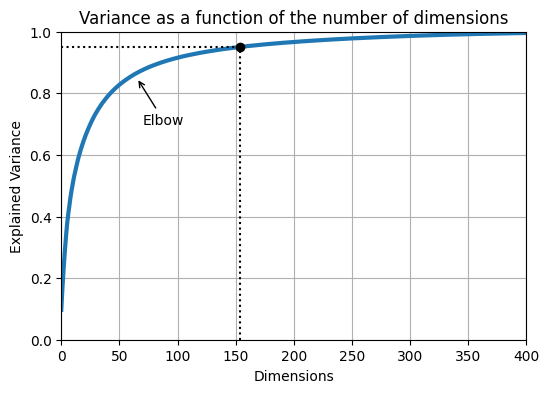

In [67]:
# Explained variance as a function of the number of dimensions

plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7), arrowprops=dict(arrowstyle="->"))
plt.grid(True)
plt.title("Variance as a function of the number of dimensions")
plt.show()

In [68]:
"""Creates a two-step pipeline:
    01. first reducing dimensionality using PCA, then classifying using a random forest.
    02. it uses RandomizedSearchCV to find a good combination of hyperparameters for both PCA and the random forest classifier.
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(PCA(random_state=42),RandomForestClassifier(random_state=42))
param_distrib = {
    "pca__n_components": np.arange(10, 80),
    "randomforestclassifier__n_estimators": np.arange(50, 500)
}
rnd_search = RandomizedSearchCV(clf, param_distrib, n_iter=10, cv=3,
                                random_state=42)
rnd_search.fit(X_train[:1000], y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [69]:
# best hyperparameters
print(rnd_search.best_params_)

{'randomforestclassifier__n_estimators': 465, 'pca__n_components': 23}


In [70]:
# import modules, define model and grid of parameters, then train for best parameters
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

clf = make_pipeline(PCA(random_state=42), SGDClassifier())
param_grid = {"pca__n_components": np.arange(10, 80)}
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_train[:1000], y_train[:1000])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('sgdclassifier', SGDClassifier())]),
             param_grid={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79])})

In [71]:
# best parameters
grid_search.best_params_

{'pca__n_components': 67}

### PCA for Compression

- **Dimensionality Reduction**: PCA can significantly reduce the size of a dataset. For instance, applying PCA to the MNIST dataset while preserving 95% of its variance reduces the 784 features to 154. This results in the dataset being less than 20% of its original size.

- **Benefits**: Reducing the number of features with PCA accelerates classification algorithms by processing fewer features, while still retaining most of the original variance (95%).

- **Decompression**: The reduced dataset can be decompressed back to its original dimensionality using PCA’s `inverse_transform()` method. The decompressed data will not be identical to the original due to the loss of 5% of variance, but it will be close.

- **Reconstruction Error**: This term represents the mean squared distance between the original and decompressed data, indicating the loss of information during compression.

- **Visual Quality**: While there may be a slight loss in quality, the essential features, such as digits in the MNIST dataset, remain largely intact.


In [72]:
# preserving 95% variance ratio: compressing
pca = PCA(0.95)
X_reduced = pca.fit_transform(X_train, y_train)

In [73]:
# decompressed back to original dimensionality
X_recovered = pca.inverse_transform(X_reduced)

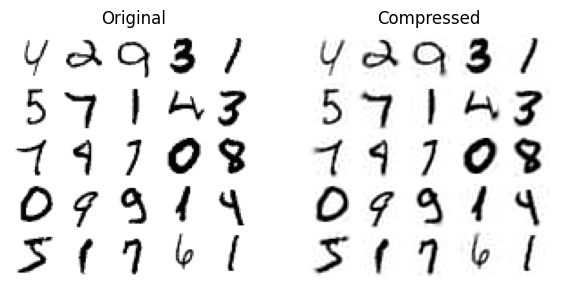

In [74]:
# comparision between original and compressed data

plt.figure(figsize=(7, 4))
for idx, X in enumerate((X_train[::2100], X_recovered[::2100])):
    plt.subplot(1, 2, idx + 1)
    plt.title(["Original", "Compressed"][idx])
    for row in range(5):
        for col in range(5):
            plt.imshow(X[row * 5 + col].reshape(28, 28), cmap="binary",
                       vmin=0, vmax=255, extent=(row, row + 1, col, col + 1))
            plt.axis([0, 5, 0, 5])
            plt.axis("off")
plt.show()

### Randomized PCA

- **Algorithm**: When setting the `svd_solver` hyperparameter to `"randomized"`, Scikit-Learn employs a stochastic algorithm known as randomized PCA. This approach quickly approximates the first `d` principal components.

- **Computational Complexity**: Randomized PCA has a computational complexity of \( O(m \times d^2) + O(d^3) \), compared to the full SVD approach, which has a complexity of \( O(m \times n^2) + O(n^3) \). This makes randomized PCA significantly faster when \( d \) is much smaller than \( n \).

- **Default Behavior**: By default, `svd_solver` is set to `"auto"`. Scikit-Learn will use randomized PCA if \( \text{max}(m, n) > 500 \) and \( n_{\text{components}} \) is less than 80% of \( \text{min}(m, n) \). Otherwise, it defaults to full SVD.

- **Forcing Full SVD**: If you prefer a more precise result and want to use full SVD, you can explicitly set `svd_solver` to `"full"`, even if randomized PCA would be used by default.


In [75]:
# compressing original data using randomized pca with svd_solver
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

### Incremental PCA

- **Problem with Standard PCA**: Traditional PCA implementations require the entire training set to fit into memory, which can be impractical for very large datasets.

- **Incremental PCA (IPCA)**: IPCA addresses this issue by processing the training set in mini-batches. This allows for the handling of large datasets and online PCA, where data is processed as it arrives.

- **Usage**:
  - **Mini-Batches**: Split the dataset into smaller mini-batches (e.g., 100 batches) and feed them into Scikit-Learn’s `IncrementalPCA` class using the `partial_fit()` method for each batch.
  - **Memory-Mapped Files**: Use NumPy’s `memmap` class to handle large arrays stored on disk. This class loads only the necessary data into memory, making it possible to fit the dataset even if it does not fit entirely in RAM.

- **Procedure**:
  1. **Create a memmap File**: Store the MNIST training set into a memory-mapped file and ensure data is saved to disk with `flush()`.
  2. **Load and Use Memmap**: Load the memmap file, use it as a regular NumPy array, and apply `IncrementalPCA` for dimensionality reduction. This method uses only a portion of the array at any time, keeping memory usage under control.

- **Considerations**:
  - **Data Type and Shape**: When loading a memmap file, specify the data type and shape to avoid errors. Default loading may result in a 1D array if shape is omitted.
  - **Alternative Methods**: For very high-dimensional datasets where PCA is too slow, consider using random projection, which is computationally less expensive.


In [76]:
# importing module, define pca, and transform the original data
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

**Task:** Using NumPy's `memmap` class – a memory-map to an array stored in a binary file on disk.

- create the `memmap` instance, copy the MNIST training set into it, and call `flush()` which ensures that any data still in cache is saved to disk.
- then load the data and use it for training

In [77]:
# creating memmap file, and load it with data, then usfe the function flush()
filename = "my_mnist.mmap"
X_mmap = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mmap[:] = X_train  # could be a loop instead, saving the data chunk by chunk
X_mmap.flush()

In [78]:
# use the memmap file to train
X_mmap = np.memmap(filename, dtype="float32", mode="readonly").reshape(-1, 784)
batch_size = X_mmap.shape[0] // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mmap)

IncrementalPCA(batch_size=600, n_components=154)

### Random Projection

- **Concept**: The random projection algorithm reduces the dimensionality of a dataset by projecting it onto a lower-dimensional space using a random linear projection. Despite being random, this method is often effective at preserving the relative distances between instances in the dataset.

- **Johnson-Lindenstrauss Lemma**: This mathematical result, proven by William B. Johnson and Joram Lindenstrauss, demonstrates that a random projection is likely to preserve distances between data points fairly well. Therefore, similar instances remain similar, and different instances remain distinct even after the projection.

- **Trade-off**: As you reduce the number of dimensions, more information and accuracy is lost. However, distances between points tend to remain consistent up to a certain point, depending on how many dimensions you retain.

- **Optimal Number of Dimensions**: The Johnson-Lindenstrauss lemma provides an equation to determine the minimum number of dimensions required to preserve the distances between data points within a certain tolerance.
  - For example, to ensure that distances change by no more than 10% (ε = 10%), the minimum number of dimensions \( d \) required can be calculated as:
$$
d \geq \frac{4 \log(m)}{\frac{1}{2} \epsilon^2 - \frac{1}{3} \epsilon^3}
$$

where \( m \) is the number of instances in the dataset. This ensures that, with high probability, the relative distances are preserved.


- **Example Calculation**: For a dataset with 5,000 instances and 20,000 features, reducing the dimensions to 7,300 would still preserve distances with a tolerance of 10%.

- **Scikit-Learn Utility**: Scikit-Learn provides the `johnson_lindenstrauss_min_dim()` function to compute the minimum number of dimensions required, based on the lemma.


In [79]:
# import module and reduce the dimensions: this take time and memory
from sklearn.random_projection import johnson_lindenstrauss_min_dim

m, ε = 5_000, 0.1
d = johnson_lindenstrauss_min_dim(m, eps=ε)
d

7300

In [80]:
# using equation directly
d = int(4 * np.log(m) / (ε ** 2 / 2 - ε ** 3 / 3))
d

7300

In [81]:
"""
  Now we can just generate a random matrix P of shape [d, n], where each item
  is sampled randomly from a Gaussian distribution with mean 0 and variance 1 / d,
  and use it to project a dataset from n dimensions down to d
"""
n = 20_000
np.random.seed(42)
P = np.random.randn(d, n) / np.sqrt(d)  # std dev = square root of variance

X = np.random.randn(m, n)  # generate a fake dataset
X_reduced = X @ P.T
print(X_reduced)

[[ 0.65601016 -1.52157349 -2.13016582 ... -3.30298058  1.86509223
  -0.62205374]
 [-1.15983875 -1.31973727  0.13553982 ... -0.9461484  -0.01875402
   1.15834454]
 [-2.79258363  0.47631317 -3.2293912  ...  1.41899815  3.03817514
  -2.07598188]
 ...
 [ 0.18867284  0.58379053  1.42444552 ...  0.13507484  1.83874287
  -0.39265772]
 [ 2.54718434  0.32063561 -3.59830134 ...  0.49247486  0.46798188
   0.09910125]
 [ 3.68422382 -2.65487692  0.55763148 ...  2.14734207 -1.82840766
   0.76915154]]


In [82]:
# gives the same result as the preceding code
from sklearn.random_projection import GaussianRandomProjection

gaussian_rnd_proj = GaussianRandomProjection(eps=ε, random_state=42)
X_reduced = gaussian_rnd_proj.fit_transform(X)  # same result as above
print(X_reduced)

[[ 0.65601016 -1.52157349 -2.13016582 ... -3.30298058  1.86509223
  -0.62205374]
 [-1.15983875 -1.31973727  0.13553982 ... -0.9461484  -0.01875402
   1.15834454]
 [-2.79258363  0.47631317 -3.2293912  ...  1.41899815  3.03817514
  -2.07598188]
 ...
 [ 0.18867284  0.58379053  1.42444552 ...  0.13507484  1.83874287
  -0.39265772]
 [ 2.54718434  0.32063561 -3.59830134 ...  0.49247486  0.46798188
   0.09910125]
 [ 3.68422382 -2.65487692  0.55763148 ...  2.14734207 -1.82840766
   0.76915154]]


In [83]:
"""
to perform the inverse transform, first need to compute the pseudo-inverse
of the components matrix using SciPy’s pinv() function,
then multiply the reduced data by the transpose of the pseudo-inverse
"""
components_pinv = np.linalg.pinv(gaussian_rnd_proj.components_)
X_recovered = X_reduced @ components_pinv.T

In [ ]:
# comparison between Gaussian and Sparse Random Projection

from sklearn.random_projection import SparseRandomProjection

print("GaussianRandomProjection fit:")
%timeit GaussianRandomProjection(random_state=42).fit(X)
print("SparseRandomProjection fit:")
%timeit SparseRandomProjection(random_state=42).fit(X)

gaussian_rnd_proj = GaussianRandomProjection(random_state=42).fit(X)
sparse_rnd_proj = SparseRandomProjection(random_state=42).fit(X)
print("GaussianRandomProjection transform:")
%timeit gaussian_rnd_proj.transform(X)
print("SparseRandomProjection transform:")
%timeit sparse_rnd_proj.transform(X)

### Locally Linear Embedding (LLE)

1. **Nonlinear Dimensionality Reduction (NLDR)**:
   - LLE is a technique for nonlinear dimensionality reduction.
   - It is a type of manifold learning that focuses on preserving local relationships, unlike projection methods like PCA.

2. **Manifold Learning**:
   - LLE works well on "unrolling" complex, twisted manifolds while maintaining local structures.
   - Particularly useful when the data has a nonlinear low-dimensional manifold.

3. **Key Steps in LLE**:
   - **Step 1**: Identify the k-nearest neighbors for each training instance and express the instance as a linear combination of these neighbors. This creates a weight matrix representing local relationships.
   - **Step 2**: Map the data into a lower-dimensional space, adjusting the positions to preserve local relationships while keeping the weight matrix fixed.

4. **Swiss Roll Example**:
   - LLE can "unroll" a Swiss roll dataset, preserving local distances between points.
   - Global distances may not be perfectly preserved, resulting in a distorted unrolled shape (stretched and twisted), but local relationships remain intact.

5. **Scikit-Learn’s LLE Implementation**:
   - Scikit-Learn’s `LocallyLinearEmbedding` class can be used to perform LLE.
   - **Computational Complexity**: LLE is computationally expensive, especially for large datasets, with complexity involving terms like \($O(m^2$)\) where \(m\) is the number of instances.

6. **Advantages and Limitations**:
   - **Advantage**: LLE constructs better low-dimensional representations for nonlinear data compared to linear methods like PCA.
   - **Limitation**: It scales poorly for very large datasets due to its computational complexity.


In [85]:
# import non-linear dataset and module, and transform the data to lower dimensions
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_unrolled = lle.fit_transform(X_swiss)

In [ ]:
# the outcome

plt.scatter(X_unrolled[:, 0], X_unrolled[:, 1],
            c=t, cmap=darker_hot)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
plt.axis([-0.055, 0.060, -0.070, 0.090])
plt.grid(True)
plt.title("Unrolled swiss roll using LLE")
plt.show()

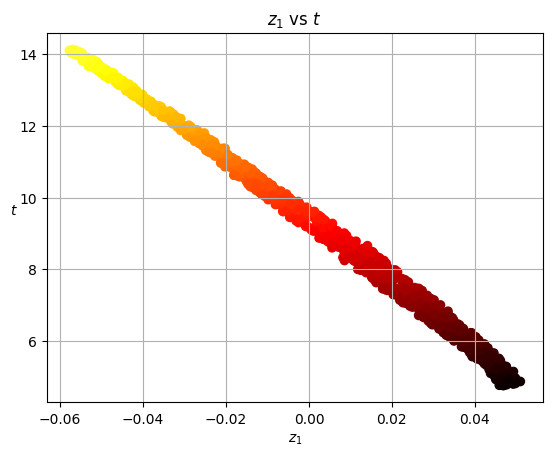

In [87]:
# How well correlated z1 is to t: LLE worked fine
plt.title("$z_1$ vs $t$")
plt.scatter(X_unrolled[:, 0], t, c=t, cmap=darker_hot)
plt.xlabel("$z_1$")
plt.ylabel("$t$", rotation=0)
plt.grid(True)
plt.show()

**Note:** for more information [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html)

### Other Dimensionality Reduction Techniques

Here are several popular dimensionality reduction techniques available in Scikit-Learn:

1. **`sklearn.manifold.MDS` (Multidimensional Scaling)**:
   - Reduces dimensionality while attempting to preserve the **distances** between instances.
   - Works well for low-dimensional data (unlike random projection which is better for high-dimensional data).

2. **`sklearn.manifold.Isomap`**:
   - Creates a graph by connecting each instance to its nearest neighbors.
   - Reduces dimensionality by preserving **geodesic distances**, which are the shortest path distances between nodes in the graph.

3. **`sklearn.manifold.TSNE` (t-distributed Stochastic Neighbor Embedding)**:
   - Reduces dimensionality while keeping **similar instances close** and **dissimilar instances apart**.
   - Commonly used for **visualization**, especially to visualize clusters in high-dimensional data (e.g., visualizing MNIST images).

4. **`sklearn.discriminant_analysis.LinearDiscriminantAnalysis` (LDA)**:
   - A linear classification algorithm that finds the most **discriminative axes** between classes during training.
   - These axes can be used for projection to keep classes far apart, making LDA a good technique for dimensionality reduction before classification.

### Visualization of Results on the Swiss Roll:
- **MDS**: Flattens the Swiss roll while maintaining its global curvature.
- **Isomap**: Discards the global structure entirely.
- **t-SNE**: Preserves some curvature


In [88]:
# Multidimensional Scaling
from sklearn.manifold import MDS

mds = MDS(n_components=2, normalized_stress=False, random_state=42)
X_reduced_mds = mds.fit_transform(X_swiss)

In [ ]:
# by generating neighbours
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X_swiss)

In [ ]:
# t-distributed stochastic neighbor embedding
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)
X_reduced_tsne = tsne.fit_transform(X_swiss)

In [ ]:
# plotting the outcome of the above three models

titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11, 5))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=darker_hot)
    plt.xlabel("$z_1$")
    if subplot == 131:
        plt.ylabel("$z_2$", rotation=0)
    plt.grid(True)
plt.suptitle("Techniques to reduce the Swiss roll to 2D")
plt.show()

### Kernel PCA

In [92]:
# import module, and transform data
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04, random_state=42)
X_reduced = rbf_pca.fit_transform(X_swiss)

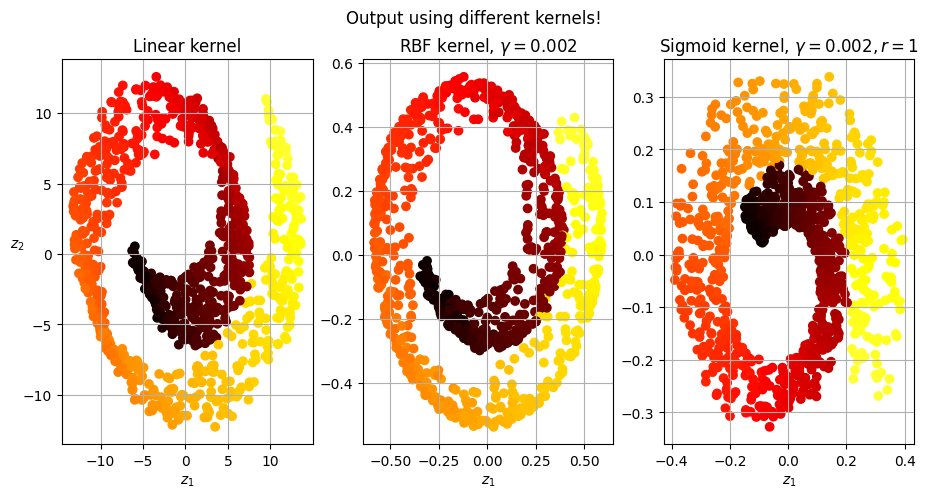

In [93]:
lin_pca = KernelPCA(kernel="linear")
rbf_pca = KernelPCA(kernel="rbf", gamma=0.002)
sig_pca = KernelPCA(kernel="sigmoid", gamma=0.002, coef0=1)

kernel_pcas = ((lin_pca, "Linear kernel"),
               (rbf_pca, rf"RBF kernel, $\gamma={rbf_pca.gamma}$"),
               (sig_pca, rf"Sigmoid kernel, $\gamma={sig_pca.gamma}, r={sig_pca.coef0}$"))

plt.figure(figsize=(11, 5))
for idx, (kpca, title) in enumerate(kernel_pcas):
    kpca.n_components = 2
    kpca.random_state = 42
    X_reduced = kpca.fit_transform(X_swiss)

    plt.subplot(1, 3, idx + 1)
    plt.title(title)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=darker_hot)
    plt.xlabel("$z_1$")
    if idx == 0:
        plt.ylabel("$z_2$", rotation=0)
    plt.grid()
plt.suptitle("Output using different kernels!")
plt.show()

**Checkout:** Those are the main concepts of the dimensionality reductions, can be used in many different cases! Thank You!